In [1]:
import numpy as np
import pandas as pd 
#import wandb

# Getting data

In [2]:
api = wandb.Api()
entity, project = "team-christian", "TorturedRats"  
runs = api.runs(entity + "/" + project, {
    "$and": [{
    'created_at': {
        "$gt": '2023-05-26T##'
        }
    }]
})

summary_list, config_list, name_list, group_list = [], [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)
    group_list.append(run.group)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "group": group_list,
    })


runs_df.to_pickle("wandb_data.pkl")

NameError: name 'wandb' is not defined

In [17]:
pd.__version__

'1.3.5'

In [3]:
import os
os.chdir('/zhome/cc/7/151856/Desktop/Bachelor/TorturedRats')

In [4]:
# when saved
runs_df = pd.read_pickle("wandb_data_old.pkl")
runs_df.head()

,summary,config,name,group
0,"{'_step': 24000, '_wandb': {'runtime': 6500}, ...","{'jobid': '16776940', 'setup': '3drpl', 'k_fol...",16776940,final_3drpl_lp_1.0
1,"{'train_iteration_loss': 0.2531167436391115, '...","{'jobid': '16776939', 'setup': '3drpl', 'k_fol...",16776939,final_3drpl_lp_1.0
2,"{'train_loss': 2.2524424280439104, 'metric': 2...","{'epochs': 3000, 'dataset': 'rat_kidney', 'dro...",olive-pond-707,None
3,"{'encoder_learning_rate': 0.0001, 'val_dice_me...","{'jobid': '16772255', 'setup': 'transfer', 'k_...",16772255,transfer_lp_1.0
4,"{'val_best_dice_metric_step': 8000, '_wandb': ...","{'jobid': '16772254', 'setup': 'transfer', 'k_...",16772254,transfer_lp_1.0


In [5]:
# Grouping by 'config' and 'group'
grouped = runs_df.groupby('group')

# You can then perform operations on the grouped data, such as counting the number of rows in each group
group_counts = grouped.size()

# Alternatively, you can iterate over the groups and access the rows within each group
filename_dice_dict_pr_group = {}
for group, group_df in grouped:
    filename_dice_dict_pr_group[group] = {k: v for d in group_df['summary'] for k, v in d.get('filename_dice_dict', {}).items()}

In [6]:
samples_list = list(filename_dice_dict_pr_group['final_3drpl_inc_enc_lp_0.01'].keys())
samples_list.sort()
groups_list = list(filename_dice_dict_pr_group.keys())
groups_list.remove('rat_kidney_37_lp_0.0')
groups_list.remove('test_lp_0.07')
groups_list.sort()

In [7]:
groups_list

['final_3drpl_inc_enc_lp_0.01',
 'final_3drpl_inc_enc_lp_0.02',
 'final_3drpl_inc_enc_lp_0.03',
 'final_3drpl_inc_enc_lp_0.05',
 'final_3drpl_inc_enc_lp_0.07',
 'final_3drpl_inc_enc_lp_0.1',
 'final_3drpl_inc_enc_lp_1.0',
 'final_3drpl_lp_0.01',
 'final_3drpl_lp_0.02',
 'final_3drpl_lp_0.03',
 'final_3drpl_lp_0.05',
 'final_3drpl_lp_0.07',
 'final_3drpl_lp_0.1',
 'final_3drpl_lp_1.0',
 'final_random_lp_0.01',
 'final_random_lp_0.02',
 'final_random_lp_0.03',
 'final_random_lp_0.05',
 'final_random_lp_0.07',
 'final_random_lp_0.1',
 'final_random_lp_1.0',
 'final_transfer_inc_enc_lp_0.01',
 'final_transfer_inc_enc_lp_0.02',
 'final_transfer_inc_enc_lp_0.03',
 'final_transfer_inc_enc_lp_0.05',
 'final_transfer_inc_enc_lp_0.07',
 'final_transfer_inc_enc_lp_0.1',
 'final_transfer_inc_enc_lp_1.0',
 'transfer_lp_0.01',
 'transfer_lp_0.02',
 'transfer_lp_0.03',
 'transfer_lp_0.05',
 'transfer_lp_0.07',
 'transfer_lp_0.1',
 'transfer_lp_1.0']

In [8]:
data = []
for group in groups_list:
    samples_values = []
    for sample in samples_list:
        samples_values.append(filename_dice_dict_pr_group[group].get(sample,0))
    data.append(samples_values)

In [9]:
test_dice_df = pd.DataFrame(data, groups_list,[e[-10:-7] for e in samples_list])
test_dice_df

,002,004,005,007,008,010,011,013,016,018,...,443,444,445,446,447,453,454,455,456,458
final_3drpl_inc_enc_lp_0.01,0.000000,0.146048,0.038431,0.409219,0.457012,0.072915,0.512038,0.386387,0.484990,0.340190,...,0.571311,0.520054,0.000000,0.348854,0.251577,0.047977,0.235483,0.311920,0.550893,0.000000
final_3drpl_inc_enc_lp_0.02,0.001082,0.412809,0.231606,0.472212,0.622983,0.014380,0.601191,0.372071,0.632409,0.312331,...,0.666764,0.598979,0.020860,0.495660,0.473393,0.317477,0.379441,0.468844,0.413972,0.000000
final_3drpl_inc_enc_lp_0.03,0.038579,0.455411,0.280340,0.432265,0.377935,0.022880,0.636378,0.502335,0.406673,0.385493,...,0.633972,0.352025,0.028292,0.361582,0.278172,0.497743,0.336600,0.349891,0.518663,0.002538
final_3drpl_inc_enc_lp_0.05,0.090323,0.436554,0.306149,0.499666,0.328998,0.000422,0.636517,0.057546,0.557953,0.407910,...,0.538525,0.512919,0.016587,0.391207,0.243148,0.553094,0.249699,0.296530,0.579401,0.012787
final_3drpl_inc_enc_lp_0.07,0.100682,0.347515,0.307807,0.523297,0.121823,0.123750,0.632126,0.289745,0.488897,0.418447,...,0.661640,0.603897,0.311775,0.302193,0.486470,0.554864,0.416244,0.411421,0.616149,0.037303
final_3drpl_inc_enc_lp_0.1,0.173140,0.468007,0.384107,0.527231,0.093965,0.144562,0.638121,0.005249,0.562119,0.418088,...,0.474761,0.666642,0.356225,0.510303,0.159002,0.544502,0.496677,0.382631,0.445889,0.150070
final_3drpl_inc_enc_lp_1.0,0.093013,0.535251,0.442203,0.514649,0.132118,0.181380,0.624189,0.310524,0.610445,0.554485,...,0.510963,0.694875,0.515188,0.434155,0.495954,0.508433,0.601622,0.176513,0.437601,0.028449
final_3drpl_lp_0.01,0.039849,0.356243,0.049472,0.245344,0.273299,0.164002,0.505006,0.069375,0.273299,0.314492,...,0.268692,0.346597,0.000217,0.322630,0.091830,0.431117,0.127540,0.042803,0.091871,0.002609
final_3drpl_lp_0.02,0.343163,0.434445,0.230371,0.529683,0.657556,0.114298,0.566823,0.000000,0.657556,0.251175,...,0.449971,0.394132,0.000000,0.502939,0.386661,0.389993,0.311751,0.013166,0.291810,0.000000
final_3drpl_lp_0.03,0.296346,0.513745,0.273107,0.390393,0.635183,0.116871,0.589189,0.007693,0.635183,0.342250,...,0.411677,0.409542,0.032507,0.399627,0.391376,0.378029,0.364532,0.000773,0.382542,0.000824


# Best and worst images

<AxesSubplot:title={'center':'20 worst mean dice pr sample'}>

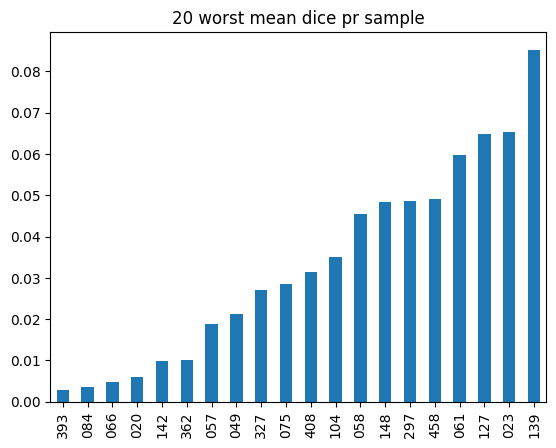

In [24]:

mean_dice_pr_sample_20_smallest = test_dice_df.mean(axis = 0).nsmallest(20)
mean_dice_pr_sample_20_smallest.plot(kind='bar',title="20 worst mean dice pr sample")



<AxesSubplot:title={'center':'20 best mean dice pr sample'}>

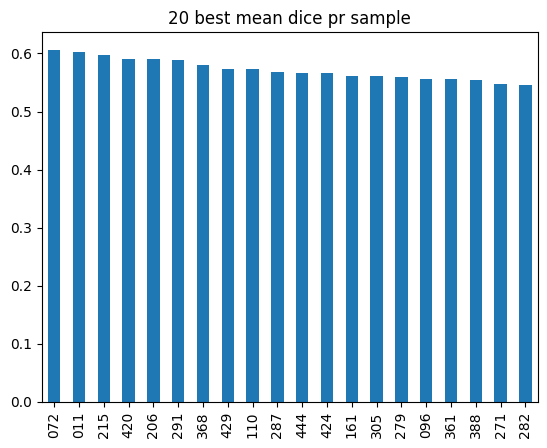

In [9]:
mean_dice_pr_sample_20_largest = test_dice_df.mean(axis = 0).nlargest(20)
mean_dice_pr_sample_20_largest.plot(kind='bar',title="20 best mean dice pr sample")



# Calculating correlation

In [94]:
hepaticDataExploration = pd.read_csv('reports/figures/Data_statistics/hepaticDataExploration.csv')
hepaticDataExploration['number'] = hepaticDataExploration['filename'].str[-10:-7]
hepaticDataExploration["img_hist"] = hepaticDataExploration["img_hist"].str.strip('[]').str.replace('\'','').str.split(', ')
hepaticDataExploration["img_hist"] = hepaticDataExploration["img_hist"].apply(np.array)
hepaticDataExploration["label_hist"] = hepaticDataExploration["label_hist"].str.strip('[]').str.replace('\'','').str.split(', ')
hepaticDataExploration["label_hist"] = hepaticDataExploration["label_hist"].apply(np.array)
hepaticDataExploration["label_hist_mean"] = [np.sum(l.astype('float64')*np.arange(-1024, 4544))/(np.sum(l.astype('float64'))- l.astype('float64')[1024]) for l in hepaticDataExploration["label_hist"]]
hepaticDataExploration["img_hist_mean"] = [np.sum(l.astype('float64')*np.arange(-1024, 4544))/(np.sum(l.astype('float64'))- l.astype('float64')[1024]) for l in hepaticDataExploration["img_hist"]]

import operator
from functools import reduce
hepaticDataExploration["scan_volume"] = reduce(operator.mul, [hepaticDataExploration["dim{}".format(i)] * hepaticDataExploration["pixdim{}".format(i)] for i in range(3)])/1000**2

hepaticDataExploration["label_contrast"] = hepaticDataExploration["label_hist_mean"] - hepaticDataExploration["img_hist_mean"]

hepaticDataExploration["img_hist_mean_std"] = abs((hepaticDataExploration["img_hist_mean"] - np.mean(hepaticDataExploration["img_hist_mean"])) / (np.std(hepaticDataExploration["img_hist_mean"])))
hepaticDataExploration["label_hist_mean_std"] = abs((hepaticDataExploration["label_hist_mean"] - np.mean(hepaticDataExploration["label_hist_mean"])) / (np.std(hepaticDataExploration["label_hist_mean"])))

hepaticDataExploration.head()

,filename,dim0,dim1,dim2,pixdim0,pixdim1,pixdim2,img_hist,label_hist,number,label_hist_mean,img_hist_mean,scan_volume,label_contrast,img_hist_mean_std,label_hist_mean_std
0,hepaticvessel_235.nii.gz,512,512,38,0.796875,0.796875,5.0,"[2119343, 6, 15, 14, 26, 38, 61, 73, 135, 154,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",235,179.750904,-490.925357,31.628160,670.676261,0.875618,0.227334
1,hepaticvessel_023.nii.gz,512,512,56,0.951172,0.951172,5.0,"[3493046, 1696, 2098, 2585, 3260, 4091, 5466, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",023,162.069452,-591.819806,66.407337,753.889258,0.382801,0.248190
2,hepaticvessel_186.nii.gz,512,512,40,0.826172,0.826172,5.0,"[2376625, 1666, 1688, 1811, 1967, 2091, 2126, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",186,182.780527,-656.862745,35.785811,839.643271,1.194057,0.308813
3,hepaticvessel_217.nii.gz,512,512,47,0.976562,0.976562,5.0,"[2756839, 2353, 2577, 2860, 3308, 3752, 4733, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",217,180.698121,-691.216440,58.749940,871.914561,1.622538,0.252809
4,hepaticvessel_068.nii.gz,512,512,40,0.822266,0.822266,5.0,"[2231249, 107, 132, 197, 324, 446, 620, 905, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",068,158.481677,-515.433080,35.448232,673.914757,0.569942,0.344680


278 278


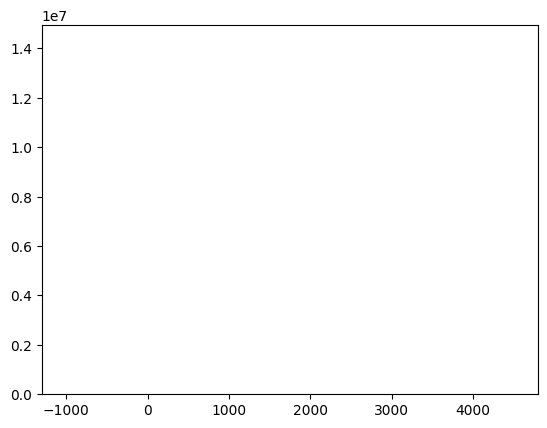

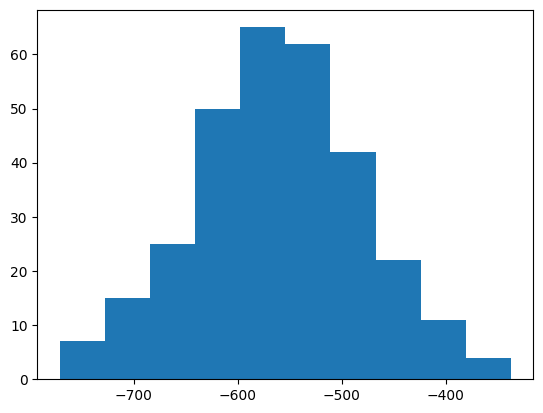

In [111]:
l = hepaticDataExploration[hepaticDataExploration["filename"]=='hepaticvessel_023.nii.gz']
x = list(np.arange(-1024, 4544).tolist())
x = x[::20][:-1]
import ast
ponimaio = [int(i) for i in l["img_hist"][1]]
ponimaio = [sum(ponimaio[20*i:20*i+20])for i in np.arange(0, len(ponimaio)//20)]
ponimaio2 = [int(i) for i in l["label_hist"][1]]
ponimaio2 = [sum(ponimaio2[20*i:20*i+20])for i in np.arange(0, len(ponimaio2)//20)]
print(len(x), len(ponimaio))
plt.bar(x, ponimaio)
plt.bar(x, ponimaio2, color="red")
plt.show()
plt.hist(hepaticDataExploration["img_hist_mean"])
plt.show()

In [26]:
mean_dice = test_dice_df.mean(axis = 0)

In [36]:
pd.Series(test_dice_df.iloc[0])

002    0.000000
004    0.146048
005    0.038431
007    0.409219
008    0.457012
         ...   
453    0.047977
454    0.235483
455    0.311920
456    0.550893
458    0.000000
Name: final_3drpl_inc_enc_lp_0.01, Length: 300, dtype: float64

In [30]:
comparisons = ['pixdim0','pixdim1','pixdim2','img_hist_mean','label_hist_mean','img_hist_mean_std','label_hist_mean_std']
for comparison in comparisons:
    comparison_series = pd.Series(list(hepaticDataExploration[comparison]),index = list(hepaticDataExploration['number']))
    temp_df = pd.concat([comparison_series, mean_dice],axis=1)
    
    print(comparison,"\n",temp_df[0].corr(temp_df[1]))

pixdim0 
 -0.12106338926078862
pixdim1 
 -0.12106338926078862
pixdim2 
 -0.18207862306619818
img_hist_mean 
 -0.03593231247340355
label_hist_mean 
 0.14558088648070003
img_hist_mean_std 
 -0.002771374097886576
label_hist_mean_std 
 -0.43601449352947175


In [42]:
test_dice_df.index
test_dice_df.loc['final_3drpl_inc_enc_lp_0.01']

002    0.000000
004    0.146048
005    0.038431
007    0.409219
008    0.457012
         ...   
453    0.047977
454    0.235483
455    0.311920
456    0.550893
458    0.000000
Name: final_3drpl_inc_enc_lp_0.01, Length: 300, dtype: float64

In [95]:
import numpy as np
comparisons = ['pixdim0','pixdim2','scan_volume', 'img_hist_mean','label_hist_mean','img_hist_mean_std','label_hist_mean_std', "label_contrast"]
heatmap = np.zeros([len(comparisons), len(test_dice_df.index)])
heatmap_pval = np.zeros([len(comparisons), len(test_dice_df.index)])

In [19]:
from scipy.stats import t
import math
from matplotlib import pyplot as plt

In [98]:
#comparison = 'label_hist_mean_std'
comparisons = ['pixdim0','pixdim2','scan_volume', 'img_hist_mean','label_hist_mean','img_hist_mean_std','label_hist_mean_std']
#comparisons = [comparisons[4]]
for i, comparison in enumerate(comparisons):
    print(f"\n\n\n#       {comparison}:{i}      #")

    comparison_series = pd.Series(list(hepaticDataExploration[comparison]),index = list(hepaticDataExploration['number']))

    for j, experiment in enumerate(test_dice_df.index):
        experiment_series = test_dice_df.loc[experiment]

        temp_df = pd.concat([comparison_series, experiment_series],axis=1)
        #plt.scatter(temp_df[0], temp_df[experiment])
        #plt.show()
        correlation = temp_df[0].corr(temp_df[experiment])
        heatmap[i, j] = correlation
        
        print(experiment, " ",comparison)
        print("Correlation: ", correlation)
        n = len(temp_df[0])
        df = n - 2
        t_obs = (correlation * math.sqrt(n - 2)) / math.sqrt(1 - correlation**2)
        print("t-obs: ", t_obs)
        p_value = 2 * (1- t.cdf(abs(t_obs), df))
        heatmap_pval[i, j] = p_value
        print("p-value: ", p_value, " Is significant: {}".format(p_value < 0.05))
        if p_value > 0.05:
            print("###########")
            print(f"####{p_value}####")
            print("###########")
        


elation:  -0.0378099550008786
t-obs:  -0.6564475964312598
p-value:  0.5120377017619977  Is significant: False
###########
####0.5120377017619977####
###########
transfer_lp_0.07   img_hist_mean
Correlation:  -0.016877778218936993
t-obs:  -0.29286022305402687
p-value:  0.7698307808581133  Is significant: False
###########
####0.7698307808581133####
###########
transfer_lp_0.1   img_hist_mean
Correlation:  0.0798873426743366
t-obs:  1.3904375736063772
p-value:  0.1654232494952399  Is significant: False
###########
####0.1654232494952399####
###########
transfer_lp_1.0   img_hist_mean
Correlation:  0.04250314944705417
t-obs:  0.7380690514786589
p-value:  0.46104752164824925  Is significant: False
###########
####0.46104752164824925####
###########



#       label_hist_mean:4      #
final_3drpl_inc_enc_lp_0.01   label_hist_mean
Correlation:  0.13480240843058444
t-obs:  2.3602778131598994
p-value:  0.01889899262566508  Is significant: True
final_3drpl_inc_enc_lp_0.02   label_hist_mean
Corr

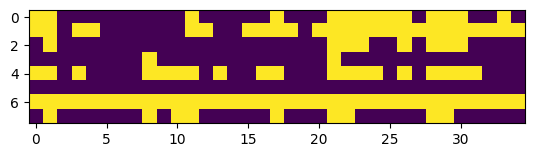

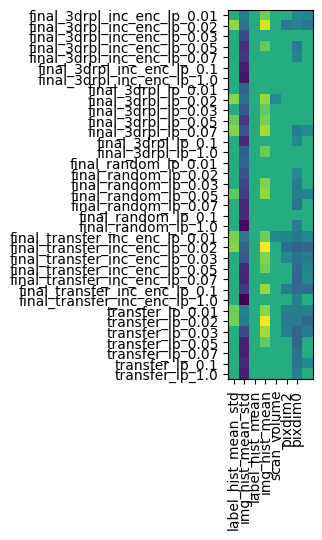

['pixdim0',
 'pixdim2',
 'scan_volume',
 'img_hist_mean',
 'label_hist_mean',
 'img_hist_mean_std',
 'label_hist_mean_std']

In [110]:
len(test_dice_df.index)
#plt.imshow(heatmap)
plt.imshow(heatmap_pval<0.05)
plt.show()
plt.imshow(np.rot90(heatmap*(heatmap_pval<0.05), 3), cmap='viridis')
x_tick_labels = list(test_dice_df.index)
plt.yticks(np.arange(len(x_tick_labels)), x_tick_labels)#, rotation=90)
plt.xticks(np.arange(len(comparisons)), comparisons[::-1], rotation=90)
plt.show()
['pixdim0','pixdim2','scan_volume', 'img_hist_mean','label_hist_mean','img_hist_mean_std','label_hist_mean_std']

In [93]:
hepaticDataExploration['img_hist_mean'].corr(hepaticDataExploration['label_hist_mean'])

-0.22789500197083623

In [112]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt

from monai.transforms import (
    AsDiscrete,
    AsDiscreted,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandCropByPosNegLabeld,
    SaveImaged,
    ScaleIntensityRanged,
    Spacingd,
    Invertd,
    LabelFilterd,
    Rand3DElasticd,
    RandRotate90d,
    RandShiftIntensityd,
    RandZoomd
)
def select_label(x):
    return x != 0

load_transform = Compose([LoadImaged(keys=["image", "label"]), CropForegroundd(
            keys=["image", "label"], select_fn=select_label, source_key="label", margin=20)])

# specify the path to the NIfTI file
hepatic_path = '/dtu/3d-imaging-center/courses/02510/data/MSD/Task08_HepaticVessel/'

# get the names of all files in the directory
file_names = [f for f in os.listdir(hepatic_path + "imagesTr/") if not f.startswith('.')]
import torch

mean_hist_crop = []

for i, fname in enumerate(file_names):
    print(f"{i + 1}", "/", f"{len(file_names)}")
    image_path = hepatic_path + ["labelsTr/", "imagesTr/"][1] + fname
    label_path = hepatic_path + ["labelsTr/", "imagesTr/"][0] + fname
    load_dict = load_transform({"image": image_path, "label": label_path})

    image = load_dict["image"]
    mean_hist_crop.append(np.mean(image.numpy()))

plt.hist(mean_hist_crop)
plt.show()

1 / 303


AttributeError: 'MetaTensor' object has no attribute 'to_numpy'